Let's import the Pandas and Seaborn libraries, and the `pyplot` module of the Matplotlib library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load and explore the dataset

In [ ]:
df = pd.read_csv('churn_data.csv')
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7034 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


Let's make a count plot, a special kind of bar plot

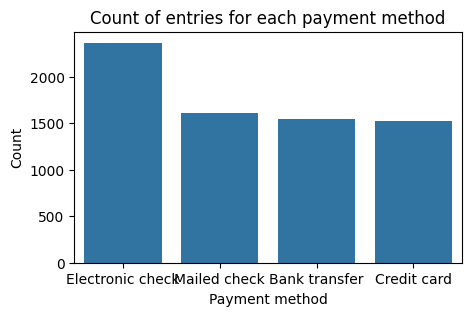

In [ ]:
plt.figure(figsize = (5, 3))
sns.countplot(data = df, x = 'PaymentMethod')
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.title('Count of entries for each payment method')
plt.show()

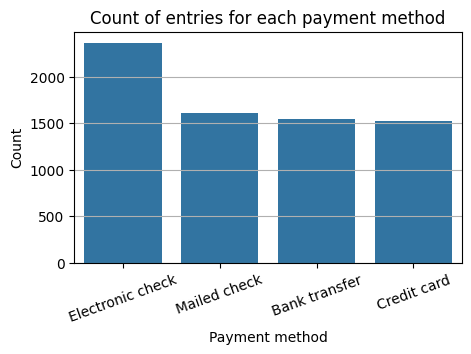

In [ ]:
plt.figure(figsize = (5, 3))
sns.countplot(data = df, x = 'PaymentMethod')
plt.xlabel('Payment method')
plt.xticks(rotation = 20)  # rotating the x-tick labels to prevent overlaps
plt.ylabel('Count')
plt.title('Count of entries for each payment method')
plt.grid(visible = True, axis = 'y')  # adding a grid to better compare the bars
plt.show()

The previous cases showed us count plots, which are a special case of bar graphs where the aggregating function is the count of rows. What if we instead wanted to show the mean or median monthly charges for each payment method?

In [ ]:
# This is what we want to display
df.groupby('PaymentMethod')['MonthlyCharges'].agg(['mean', 'median'])

,mean,median
PaymentMethod,,
Bank transfer,67.192649,73.100
Credit card,66.512385,73.025
Electronic check,76.255814,80.550
Mailed check,43.917060,34.700


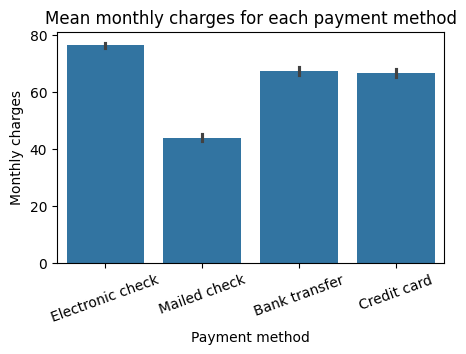

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data = df, x = 'PaymentMethod', y = 'MonthlyCharges')  # by default, sns.barplot() will use the mean while aggregating
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Mean monthly charges for each payment method')
plt.show()

The little black lines at the ends of each bar are called error bars. Error bars appear when using a measure of central tendency to show the uncertainty in the value. They can be of various forms: confidence intervals, standard deviation, percentile error, and standard error. By default, the error bar show a 95% confidence interval. Let's remove the error bars in our plots

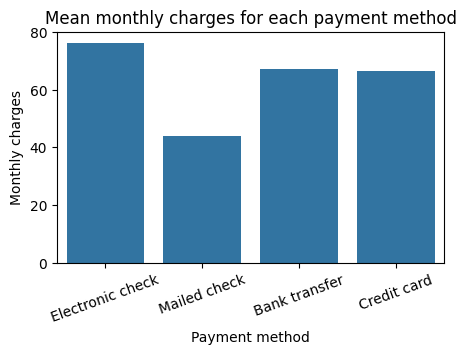

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data = df, x = 'PaymentMethod', y = 'MonthlyCharges', errorbar = None)  # you can remove the errorbars
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Mean monthly charges for each payment method')
plt.show()

What if we would like to change the aggregating function used to the median?

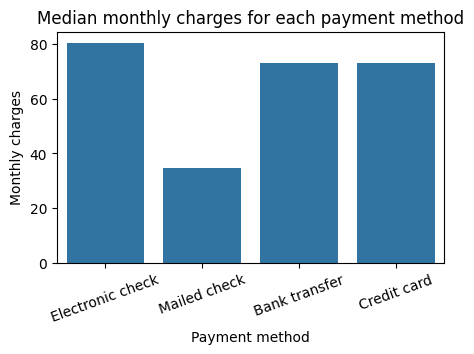

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(
    data = df,
    x = 'PaymentMethod',
    y = 'MonthlyCharges',
    estimator = 'median',  # changing the aggregating function to median
    errorbar = None
)
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Median monthly charges for each payment method')
plt.show()

Let's sort the x-axis alphabetically

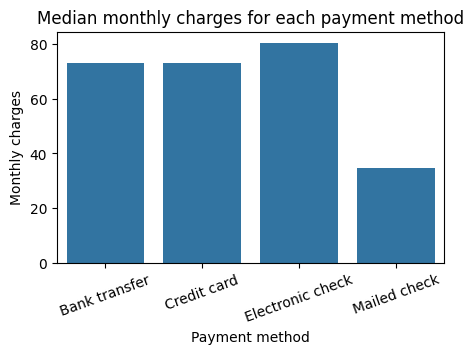

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(
    data = df,
    x = 'PaymentMethod',
    y = 'MonthlyCharges',
    estimator = 'median',
    errorbar = None,
    order = sorted(df['PaymentMethod'].unique())  # sorting the bars alphabetically by payment name
)
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Median monthly charges for each payment method')
plt.show()

Maybe we would prefer to show the bars in descending order instead

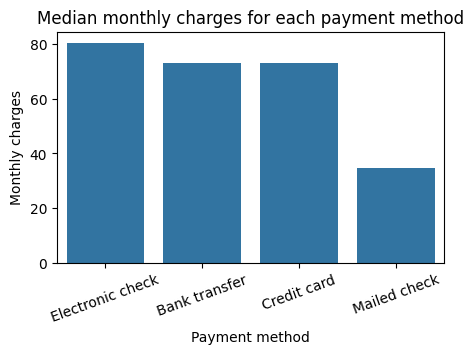

In [ ]:
# Calculating the median monthly charges and sorting the DataFrame in descending order based on these charges
df_median_monthly_charges = df.groupby(['PaymentMethod'])['MonthlyCharges'].median().reset_index().sort_values('MonthlyCharges', ascending = False)

plt.figure(figsize = (5, 3))
sns.barplot(
    data = df,
    x = 'PaymentMethod',
    y = 'MonthlyCharges',
    estimator = 'median',
    errorbar = None,
    order = df_median_monthly_charges['PaymentMethod']  # ordering payment methods in descending order of their median monthly charges
)
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Median monthly charges for each payment method')
plt.show()

What if we wanted to further break this down to account for whether the billing is paperless or not?

In [ ]:
# This is what we want to depict
df.groupby(['PaymentMethod', 'PaperlessBilling'])['MonthlyCharges'].median()

PaymentMethod     PaperlessBilling
Bank transfer     No                  59.450
                  Yes                 80.450
Credit card       No                  55.200
                  Yes                 80.225
Electronic check  No                  72.650
                  Yes                 84.350
Mailed check      No                  23.650
                  Yes                 54.100
Name: MonthlyCharges, dtype: float64

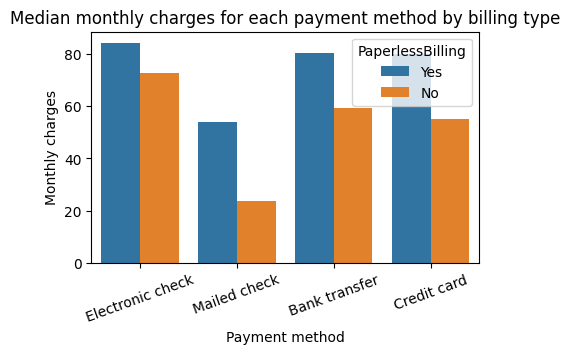

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(
    data = df,
    x = 'PaymentMethod',
    y = 'MonthlyCharges',
    hue = 'PaperlessBilling',  # breaking down each bar using colours to represent 'PaperlessBilling'
    estimator = 'median',
    errorbar = None,
)
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Median monthly charges for each payment method by billing type')

plt.show()

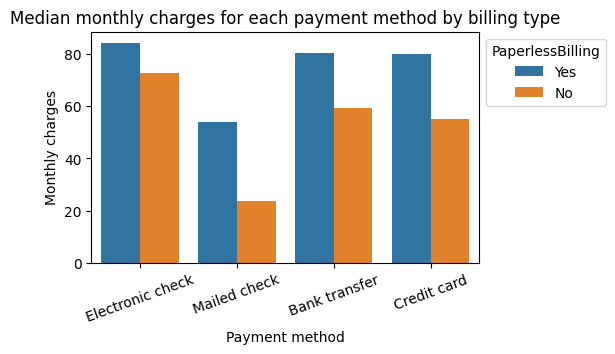

In [ ]:
plt.figure(figsize = (5, 3))
ax = sns.barplot(  # assigning the plot to a variable so it can be used by sns.move_legend()
    data = df,
    x = 'PaymentMethod',
    y = 'MonthlyCharges',
    hue = 'PaperlessBilling',
    estimator = 'median',
    errorbar = None,
)
plt.xlabel('Payment method')
plt.xticks(rotation = 20)
plt.ylabel('Monthly charges')
plt.title('Median monthly charges for each payment method by billing type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))  # moving the legend outside the plot

plt.show()